In [ ]:
"""
plot the spatial pattern of extremes and the composite analysis of 
surface temperature
"""
#%%
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt


In [2]:
allens = xr.open_dataset(
            "/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc"
        )

In [3]:
allens

<xarray.Dataset>
Dimensions:    (time: 149, bnds: 2, lon: 70, lat: 32, plev: 2600)
Coordinates:
  * time       (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00
  * lon        (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 35.62 37.5 39.38
  * lat        (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7.75e+04 ... 50.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    var156     (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.6
    institution:               Max Planck Institute for Meteorology
    history:                   Fri Jul 15 10:59:24 2022: cdo -r -copy allens_...
    cdo_openmp_thread_number:  48
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.5 (https://...

In [11]:
data_p = allens.isel(time = 0, plev = 0,bnds = 0).var156

In [12]:
data_p

<xarray.DataArray 'var156' (lat: 32, lon: 70)>
[2240 values with dtype=float32]
Coordinates:
    time     object 1851-03-16 11:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
    plev     float64 1e+05
Attributes:
    code:              156
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
    cell_methods:      time: mean

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/tmp/ipykernel_385819/1526703149.py:6: ProplotWarning: Got conflicting or duplicate keyword args: {'x_positional': <xarray.DataArray 'var156' (lat: 32, lon: 70)>
array([[115.53945 , 113.141014, 110.16445 , ...,  94.82656 ,  95.291405,
         95.67031 ],
       [115.04336 , 111.560936, 107.041405, ...,  91.59023 ,  92.691795,
         93.78164 ],
       [114.66836 , 111.725   , 107.68008 , ...,  83.84414 ,  86.91445 ,
         89.82656 ],
       ...,
       [174.36368 , 172.54337 , 173.00235 , ..., 137.89102 , 134.2504  ,
        137.71524 ],
       [167.26407 , 166.5668  , 164.88321 , ..., 132.85391 , 133.44766 ,
        130.13907 ],
       [157.19766 , 157.87149 , 156.42813 , ..., 125.535545, 122.30703 ,
      

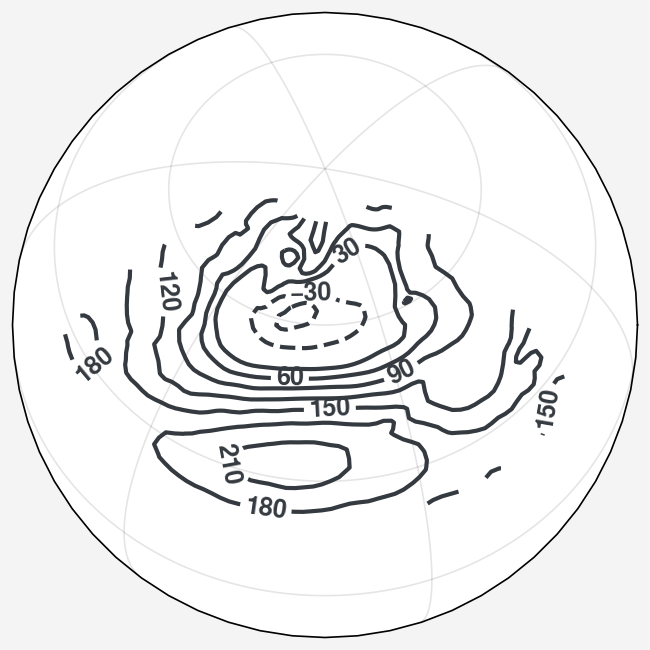

In [17]:
fig, axes = pplt.subplots(space=0, refwidth="25em", wspace=3, hspace=3,
                          proj="ortho", proj_kw=({"lon_0": -20, "lat_0": 60}),
                          nrows = 1, ncols = 1
)

axes.contour(data_p, x = 'lon',y = 'lat',nozero=True, color='gray8',
    labels=True, labels_kw={'weight': 'bold'})